# Data Sources

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
bv_reviews = pd.read_csv("./data/building-violations.csv")
bv_reviews

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677783,1479309,2006-07-14T14:23:34.000,2006-01-01T00:00:00.000,CN198019,OPEN,NaN,FILE BLDG REGISTRATION,NaN,REGISTER BUILDING 2003-06,File building registration statement with Buil...,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677784,1552683,2006-08-11T14:36:28.000,2006-01-01T00:00:00.000,NC2071,OPEN,NaN,WORK NOT ALLOWED,NaN,PERMIT REQUIRED FOR LINTEL REPLACEMENT,Remove work performed without permit and resto...,...,48.0,41.909590,-87.633245,"{'latitude': '41.90959014268417', 'human_addre...",37.0,14926.0,54.0,290.0,46.0,51.0
1677785,1479310,2008-10-08T13:58:16.000,2006-01-01T00:00:00.000,CN190029,COMPLIED,2008-08-13T00:00:00.000,ARRANGE FOR REINSPECTION REGAR,NaN,ARRANGE FOR A RE-INSPECTION,pending notice reinspection,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677786,1487027,2006-07-14T14:38:23.000,2006-01-01T00:00:00.000,EL0020,OPEN,NaN,SUPPORT FIXTURES,NaN,DUP VIOLATION,"Support loose light fixture. (18-27-410.15, 18...",...,NaN,41.812888,-87.617602,"{'latitude': '41.812888442188886', 'human_addr...",4.0,4301.0,36.0,162.0,9.0,12.0


# Data Visualization and Summary

In [2]:
bv_reviews.groupby('VIOLATION CODE').ID.count().sort_values()

VIOLATION CODE
ES0101          1
EV0100          1
EV0097          1
EV0096          1
EV0079          1
            ...  
CN070024    43673
EV1110      43700
CN061014    51946
CN196029    58136
CN190019    89995
Name: ID, Length: 1468, dtype: int64

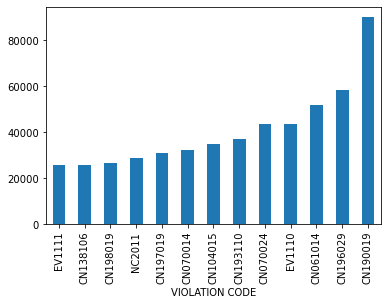

In [3]:
VC_filter_reviews = bv_reviews.groupby('VIOLATION CODE').filter(lambda x: len(x) >= 25000)
VC_reviews = VC_filter_reviews.groupby('VIOLATION CODE').ID.count().sort_values()
VC_reviews.plot.bar()

In [4]:
bv_reviews.groupby('VIOLATION DESCRIPTION').ID.count().sort_values()

VIOLATION DESCRIPTION
ZONING REQUIRES ADDTL REVIEW          1
REPR FIRE ESCAPE OF VCNT CMPRM        1
PROVIDE LOAD CALCULATIONS FOR         1
INSTALL NON-VISION H/W DR FRT         1
PROVIDE METAL PLAT/GRD FRT            1
                                  ...  
REPAIR PORCH SYSTEM               43673
MAINTAIN OR REPAIR ELECT ELEVA    43700
REPAIR EXTERIOR WALL              51946
POST OWNER/MANAGERS NAME/#        58136
ARRANGE PREMISE INSPECTION        90004
Name: ID, Length: 1312, dtype: int64

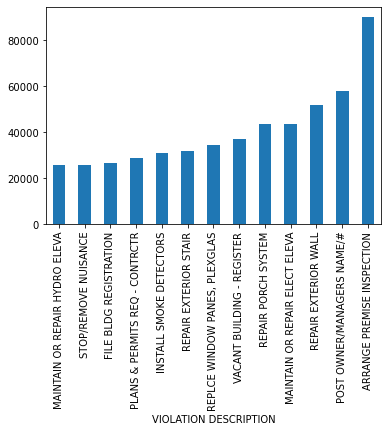

In [5]:
VD_filter_reviews = bv_reviews.groupby('VIOLATION DESCRIPTION').filter(lambda x: len(x) >= 25000)
VD_reviews = VD_filter_reviews.groupby('VIOLATION DESCRIPTION').ID.count().sort_values()
VD_reviews.plot.bar()

In [6]:
bv_reviews.groupby('VIOLATION LOCATION').ID.count().sort_values()

VIOLATION LOCATION
!ST FLOOR                                      1
INTERIOR:003 :8236  3W                         1
INTERIOR:003 :8243 3RD                         1
INTERIOR:003 :8243 3RD FLOOR APARTMENT         1
INTERIOR:003 :826 E. APT. # 3.                 1
                                           ...  
EXTERIOR:W   :                             19460
EXTERIOR:E   :                             21522
OTHER   :    :BUILDING                     21934
OTHER   :    :OTHER                        35182
OTHER   :    :                            284277
Name: ID, Length: 52821, dtype: int64

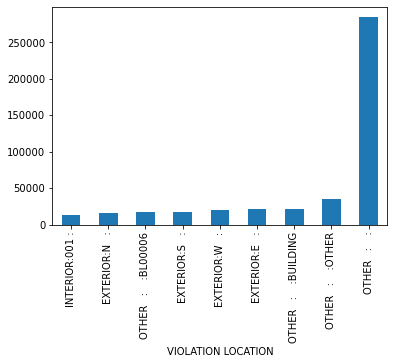

In [7]:
VL_filter_reviews = bv_reviews.groupby('VIOLATION LOCATION').filter(lambda x: len(x) >= 10000)
VL_reviews = VL_filter_reviews.groupby('VIOLATION LOCATION').ID.count().sort_values()
VL_reviews.plot.bar()

In [8]:
bv_reviews.groupby('INSPECTOR ID').ID.count().sort_values()

INSPECTOR ID
557556           1
DS00009          1
CN00085PL        2
290668           2
BL00888          2
             ...  
BL00941      48717
BL00746      48797
BL00831      52450
BL01000      58497
BL00444      79336
Name: ID, Length: 361, dtype: int64

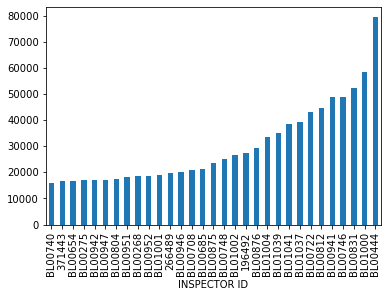

In [9]:
IID_filter_reviews = bv_reviews.groupby('INSPECTOR ID').filter(lambda x: len(x) >= 15000)
IID_reviews = IID_filter_reviews.groupby('INSPECTOR ID').ID.count().sort_values()
IID_reviews.plot.bar()

In [10]:
bv_reviews.groupby('INSPECTION STATUS').ID.count().sort_values()

INSPECTION STATUS
HOLD          154
CLOSED     224784
PASSED     293076
FAILED    1159758
Name: ID, dtype: int64

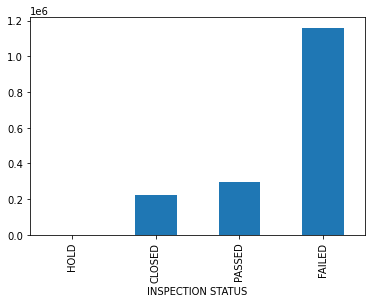

In [11]:
IS_filter_reviews = bv_reviews.groupby('INSPECTION STATUS').filter(lambda x: len(x) >= 100)
IS_reviews = IS_filter_reviews.groupby('INSPECTION STATUS').ID.count().sort_values()
IS_reviews.plot.bar()

In [12]:
bv_reviews.groupby('INSPECTION CATEGORY').ID.count().sort_values()

INSPECTION CATEGORY
REGISTRATION       2586
PERMIT            73600
PERIODIC         415176
COMPLAINT       1186426
Name: ID, dtype: int64

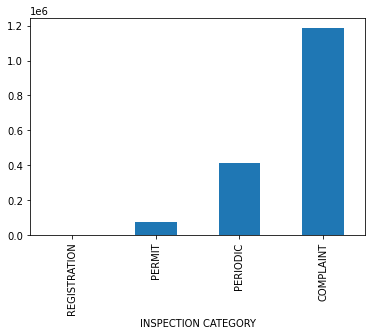

In [13]:
IC_filter_reviews = bv_reviews.groupby('INSPECTION CATEGORY').filter(lambda x: len(x) >= 2000)
IC_reviews = IC_filter_reviews.groupby('INSPECTION CATEGORY').ID.count().sort_values()
IC_reviews.plot.bar()

In [14]:
bv_reviews.groupby('DEPARTMENT BUREAU').ID.count().sort_values()

DEPARTMENT BUREAU
CONSTRUCTION EQUIPMENT            556
WATER                             786
IRON                            14405
SIGNS                           14539
SPECIAL INSPECTION PROGRAM      21033
PLUMBING                        28199
REFRIGERATION                   29681
NEW CONSTRUCTION                29938
BOILER                          31235
VENTILATION                     32108
ELECTRICAL                      37243
ELEVATOR                        85805
SPECIAL TASK FORCE             115885
DEMOLITION                     125464
CONSERVATION                  1110911
Name: ID, dtype: int64

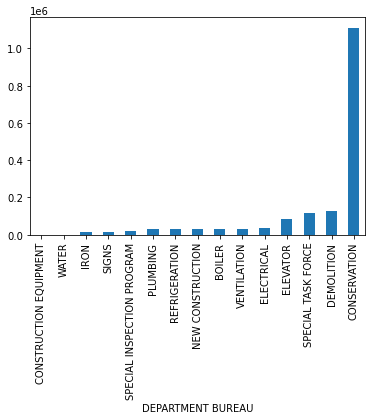

In [15]:
DB_filter_reviews = bv_reviews.groupby('DEPARTMENT BUREAU').filter(lambda x: len(x) >= 120)
DB_reviews = DB_filter_reviews.groupby('DEPARTMENT BUREAU').ID.count().sort_values()
DB_reviews.plot.bar()

In [16]:
bv_reviews.groupby('STREET DIRECTION').ID.count().sort_values()

STREET DIRECTION
E     98207
N    395246
W    500418
S    683917
Name: ID, dtype: int64

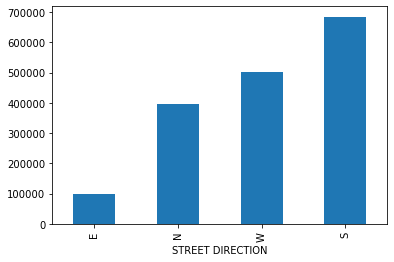

In [17]:
SD_filter_reviews = bv_reviews.groupby('STREET DIRECTION').filter(lambda x: len(x) >= 120)
SD_reviews = SD_filter_reviews.groupby('STREET DIRECTION').ID.count().sort_values()
SD_reviews.plot.bar()

In [18]:
bv_reviews.groupby('STREET TYPE').ID.count().sort_values()

STREET TYPE
LN           3
WAY          8
EXPY        10
PLZ        639
HWY       1559
TER       2222
CT        3287
PKWY      6605
DR       27145
RD       41100
PL       57665
BLVD     59536
ST      523743
AVE     940725
Name: ID, dtype: int64

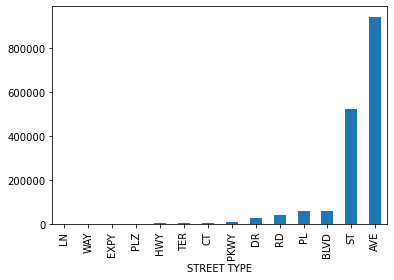

In [19]:
ST_filter_reviews = bv_reviews.groupby('STREET TYPE').filter(lambda x: len(x) >= 3)
ST_reviews = ST_filter_reviews.groupby('STREET TYPE').ID.count().sort_values()
ST_reviews.plot.bar()

In [20]:
bv_reviews.groupby('Community Areas').ID.count().sort_values()

Community Areas
77.0     1890
2.0      1914
51.0     2126
43.0     2893
75.0     3089
        ...  
25.0    54301
30.0    54436
24.0    54934
39.0    62879
26.0    97754
Name: ID, Length: 77, dtype: int64

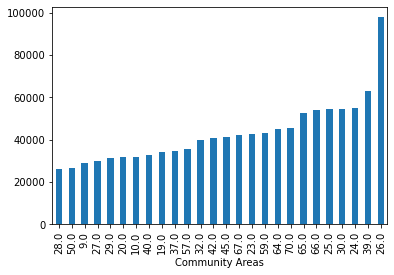

In [21]:
CA_filter_reviews = bv_reviews.groupby('Community Areas').filter(lambda x: len(x) >= 25000)
CA_reviews = CA_filter_reviews.groupby('Community Areas').ID.count().sort_values()
CA_reviews.plot.bar()

In [22]:
bv_reviews.groupby('Zip Codes').ID.count().sort_values()

Zip Codes
16181.0        4
4456.0         7
9012.0        14
4457.0        21
4458.0        22
           ...  
22257.0    61235
21202.0    63458
21546.0    67402
21861.0    69403
21569.0    79463
Name: ID, Length: 66, dtype: int64

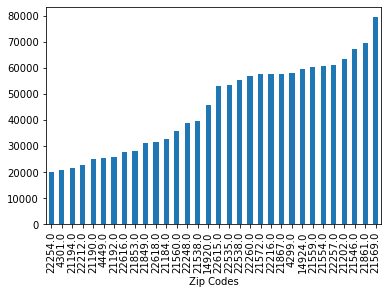

In [23]:
ZC_filter_reviews = bv_reviews.groupby('Zip Codes').filter(lambda x: len(x) >= 20000)
ZC_reviews = ZC_filter_reviews.groupby('Zip Codes').ID.count().sort_values()
ZC_reviews.plot.bar()

In [24]:
bv_reviews.groupby('Boundaries - ZIP Codes').ID.count().sort_values()

Boundaries - ZIP Codes
38.0      145
27.0      342
51.0      349
47.0     1989
29.0     2028
        ...  
59.0    62103
25.0    63330
61.0    67501
19.0    68579
57.0    80508
Name: ID, Length: 61, dtype: int64

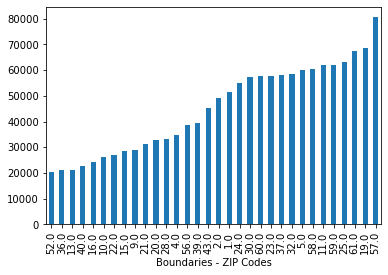

In [25]:
BZC_filter_reviews = bv_reviews.groupby('Boundaries - ZIP Codes').filter(lambda x: len(x) >= 20000)
BZC_reviews = BZC_filter_reviews.groupby('Boundaries - ZIP Codes').ID.count().sort_values()
BZC_reviews.plot.bar()

In [26]:
bv_reviews.groupby('Census Tracts').ID.count().sort_values()

Census Tracts
313.0        1
334.0        3
414.0       27
415.0       42
219.0       52
         ...  
332.0     8091
456.0     8270
319.0     8275
584.0     9120
92.0     10207
Name: ID, Length: 801, dtype: int64

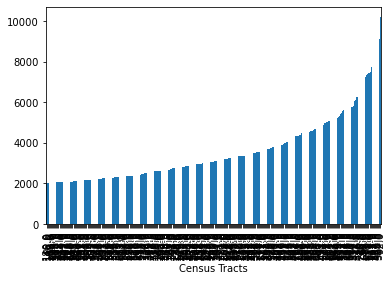

In [27]:
CTS_filter_reviews = bv_reviews.groupby('Census Tracts').filter(lambda x: len(x) >= 2000)
CTS_reviews = CTS_filter_reviews.groupby('Census Tracts').ID.count().sort_values()
CTS_reviews.plot.bar()

In [28]:
bv_reviews.groupby('Wards').ID.count().sort_values()

Wards
29.0    10238
15.0    12964
42.0    13119
19.0    14995
6.0     15819
30.0    16740
38.0    18377
50.0    18714
39.0    18860
34.0    19901
18.0    20475
8.0     21492
21.0    21823
44.0    21887
24.0    22401
25.0    23124
11.0    24010
16.0    24116
40.0    24388
27.0    24460
10.0    24672
20.0    24707
28.0    25076
17.0    26832
12.0    28551
26.0    31054
48.0    31417
5.0     31759
1.0     32926
47.0    34787
36.0    35042
3.0     36092
13.0    36719
49.0    37524
41.0    37981
33.0    38805
9.0     39017
43.0    42013
7.0     42138
22.0    43692
35.0    49887
45.0    53321
31.0    53403
37.0    54373
46.0    55818
14.0    63290
23.0    67614
4.0     68054
32.0    69159
2.0     71883
Name: ID, dtype: int64

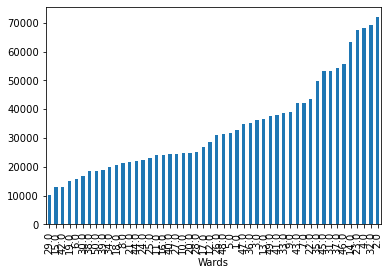

In [29]:
Wards_filter_reviews = bv_reviews.groupby('Wards').filter(lambda x: len(x) >= 2000)
Wards_reviews = Wards_filter_reviews.groupby('Wards').ID.count().sort_values()
Wards_reviews.plot.bar()

In [30]:
bv_reviews.groupby('Historical Wards 2003-2015').ID.count().sort_values()

Historical Wards 2003-2015
34.0    10764
35.0    13002
33.0    13568
39.0    15236
23.0    17565
20.0    19068
25.0    19129
37.0    19773
13.0    19992
6.0     20539
28.0    20849
51.0    21347
1.0     22364
40.0    22943
46.0    23139
2.0     23529
38.0    23824
29.0    25391
14.0    25875
42.0    25902
15.0    26584
27.0    26957
49.0    27515
3.0     29475
16.0    29539
8.0     31085
7.0     31309
47.0    34471
10.0    34525
24.0    34635
26.0    36307
18.0    37804
30.0    38215
48.0    38575
12.0    38754
22.0    39765
52.0    39807
32.0    41825
45.0    41913
4.0     42713
9.0     43862
43.0    49014
44.0    52222
41.0    52633
31.0    53830
19.0    55699
53.0    61275
17.0    62891
11.0    67299
36.0    71212
Name: ID, dtype: int64

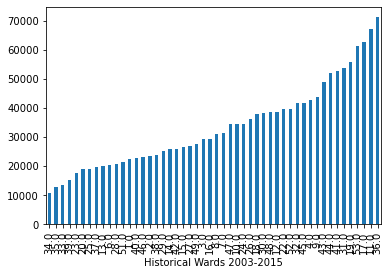

In [31]:
HisWards_filter_reviews = bv_reviews.groupby('Historical Wards 2003-2015').filter(lambda x: len(x) >= 2000)
HisWards_reviews = HisWards_filter_reviews.groupby('Historical Wards 2003-2015').ID.count().sort_values()
HisWards_reviews.plot.bar()

In [32]:
np.percentile(bv_reviews.loc[bv_reviews.LATITUDE >= min(bv_reviews.LATITUDE)].LATITUDE, (25, 50, 75))

array([41.7708965 , 41.85400234, 41.91350419])

In [33]:
bv_reviews.LATITUDE.isnull().sum()

1510

{'whiskers': [<matplotlib.lines.Line2D at 0x1fafcff64f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fafcff6bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fafcff6190>],
 'medians': [<matplotlib.lines.Line2D at 0x1fafd0022b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fafd0025b0>],
 'means': []}

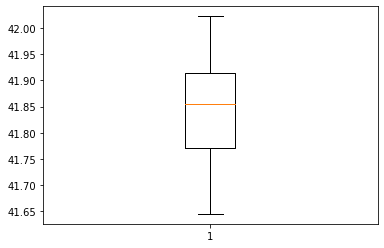

In [34]:
plt.boxplot(bv_reviews.loc[bv_reviews.LATITUDE >= min(bv_reviews.LATITUDE)].LATITUDE)

In [35]:
np.percentile(bv_reviews.loc[bv_reviews.LONGITUDE >= min(bv_reviews.LONGITUDE)].LONGITUDE, (25, 50, 75))

array([-87.7139177 , -87.6698535 , -87.63288274])

In [36]:
bv_reviews.LONGITUDE.isnull().sum()

1510

{'whiskers': [<matplotlib.lines.Line2D at 0x1fafd05a100>,
 'caps': [<matplotlib.lines.Line2D at 0x1fafd05a7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fafd04bd60>],
 'medians': [<matplotlib.lines.Line2D at 0x1fafd05ae80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fafd0631c0>],
 'means': []}

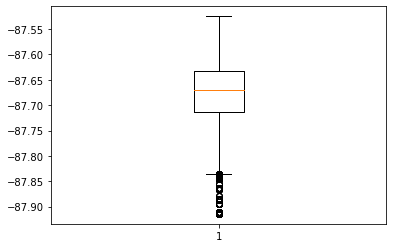

In [37]:
plt.boxplot(bv_reviews.loc[bv_reviews.LONGITUDE >= min(bv_reviews.LONGITUDE)].LONGITUDE)

# Dealing with Missing Data

In [38]:
bv_reviews_deal1 = bv_reviews[bv_reviews['LATITUDE'].notna()]
bv_reviews_deal1

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677783,1479309,2006-07-14T14:23:34.000,2006-01-01T00:00:00.000,CN198019,OPEN,NaN,FILE BLDG REGISTRATION,NaN,REGISTER BUILDING 2003-06,File building registration statement with Buil...,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677784,1552683,2006-08-11T14:36:28.000,2006-01-01T00:00:00.000,NC2071,OPEN,NaN,WORK NOT ALLOWED,NaN,PERMIT REQUIRED FOR LINTEL REPLACEMENT,Remove work performed without permit and resto...,...,48.0,41.909590,-87.633245,"{'latitude': '41.90959014268417', 'human_addre...",37.0,14926.0,54.0,290.0,46.0,51.0
1677785,1479310,2008-10-08T13:58:16.000,2006-01-01T00:00:00.000,CN190029,COMPLIED,2008-08-13T00:00:00.000,ARRANGE FOR REINSPECTION REGAR,NaN,ARRANGE FOR A RE-INSPECTION,pending notice reinspection,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677786,1487027,2006-07-14T14:38:23.000,2006-01-01T00:00:00.000,EL0020,OPEN,NaN,SUPPORT FIXTURES,NaN,DUP VIOLATION,"Support loose light fixture. (18-27-410.15, 18...",...,NaN,41.812888,-87.617602,"{'latitude': '41.812888442188886', 'human_addr...",4.0,4301.0,36.0,162.0,9.0,12.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1facbb28d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1facbb30d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1facbb28190>],
 'medians': [<matplotlib.lines.Line2D at 0x1facbb39d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1facbb400d0>],
 'means': []}

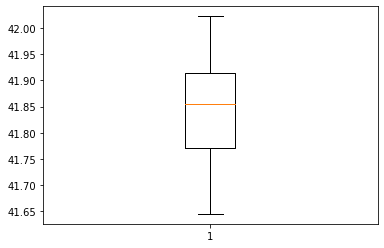

In [39]:
plt.boxplot(bv_reviews_deal1.LATITUDE)

{'whiskers': [<matplotlib.lines.Line2D at 0x1facb447a60>,
 'caps': [<matplotlib.lines.Line2D at 0x1facbad20d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1facba8b7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1facbad2be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1facbada7c0>],
 'means': []}

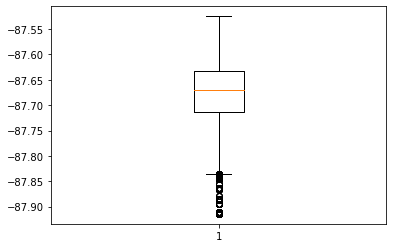

In [40]:
plt.boxplot(bv_reviews_deal1.LONGITUDE)

In [41]:
bv_reviews_deal2 = bv_reviews
ser1_deal2 = pd.Series(bv_reviews_deal1['LATITUDE'])
ser2_deal2 = pd.Series(bv_reviews_deal1['LONGITUDE'])
bv_reviews_deal2['LATITUDE'] = bv_reviews_deal2['LATITUDE'].fillna(ser1_deal2.mode()[0]) 
bv_reviews_deal2['LONGITUDE'] = bv_reviews_deal2['LONGITUDE'].fillna(ser2_deal2.mode()[0])
bv_reviews_deal2

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677783,1479309,2006-07-14T14:23:34.000,2006-01-01T00:00:00.000,CN198019,OPEN,NaN,FILE BLDG REGISTRATION,NaN,REGISTER BUILDING 2003-06,File building registration statement with Buil...,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677784,1552683,2006-08-11T14:36:28.000,2006-01-01T00:00:00.000,NC2071,OPEN,NaN,WORK NOT ALLOWED,NaN,PERMIT REQUIRED FOR LINTEL REPLACEMENT,Remove work performed without permit and resto...,...,48.0,41.909590,-87.633245,"{'latitude': '41.90959014268417', 'human_addre...",37.0,14926.0,54.0,290.0,46.0,51.0
1677785,1479310,2008-10-08T13:58:16.000,2006-01-01T00:00:00.000,CN190029,COMPLIED,2008-08-13T00:00:00.000,ARRANGE FOR REINSPECTION REGAR,NaN,ARRANGE FOR A RE-INSPECTION,pending notice reinspection,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677786,1487027,2006-07-14T14:38:23.000,2006-01-01T00:00:00.000,EL0020,OPEN,NaN,SUPPORT FIXTURES,NaN,DUP VIOLATION,"Support loose light fixture. (18-27-410.15, 18...",...,NaN,41.812888,-87.617602,"{'latitude': '41.812888442188886', 'human_addr...",4.0,4301.0,36.0,162.0,9.0,12.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1fafd1277f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fafd127eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fafd127490>],
 'medians': [<matplotlib.lines.Line2D at 0x1fafd1315b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fafd1318b0>],
 'means': []}

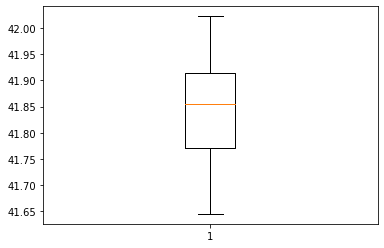

In [42]:
plt.boxplot(bv_reviews_deal2.LATITUDE)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fafd1807c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fafd180e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fafd180460>],
 'medians': [<matplotlib.lines.Line2D at 0x1fafd18d580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fafd18d880>],
 'means': []}

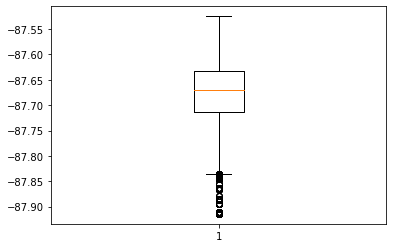

In [43]:
plt.boxplot(bv_reviews_deal2.LONGITUDE)

In [44]:
bv_reviews_deal3 = bv_reviews
bv_reviews_deal3['LATITUDE'] = bv_reviews_deal3['LATITUDE'].fillna(method='bfill') 
bv_reviews_deal3['LONGITUDE'] = bv_reviews_deal3['LONGITUDE'].fillna(method='bfill') 
bv_reviews_deal3

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677783,1479309,2006-07-14T14:23:34.000,2006-01-01T00:00:00.000,CN198019,OPEN,NaN,FILE BLDG REGISTRATION,NaN,REGISTER BUILDING 2003-06,File building registration statement with Buil...,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677784,1552683,2006-08-11T14:36:28.000,2006-01-01T00:00:00.000,NC2071,OPEN,NaN,WORK NOT ALLOWED,NaN,PERMIT REQUIRED FOR LINTEL REPLACEMENT,Remove work performed without permit and resto...,...,48.0,41.909590,-87.633245,"{'latitude': '41.90959014268417', 'human_addre...",37.0,14926.0,54.0,290.0,46.0,51.0
1677785,1479310,2008-10-08T13:58:16.000,2006-01-01T00:00:00.000,CN190029,COMPLIED,2008-08-13T00:00:00.000,ARRANGE FOR REINSPECTION REGAR,NaN,ARRANGE FOR A RE-INSPECTION,pending notice reinspection,...,NaN,41.794852,-87.619674,"{'latitude': '41.794852380662455', 'human_addr...",7.0,21192.0,10.0,401.0,9.0,12.0
1677786,1487027,2006-07-14T14:38:23.000,2006-01-01T00:00:00.000,EL0020,OPEN,NaN,SUPPORT FIXTURES,NaN,DUP VIOLATION,"Support loose light fixture. (18-27-410.15, 18...",...,NaN,41.812888,-87.617602,"{'latitude': '41.812888442188886', 'human_addr...",4.0,4301.0,36.0,162.0,9.0,12.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1faff251850>,
 'caps': [<matplotlib.lines.Line2D at 0x1faff251f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1faff2514f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1faff25d610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1faff25d910>],
 'means': []}

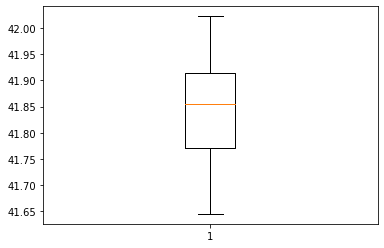

In [45]:
plt.boxplot(bv_reviews_deal3.LATITUDE)

{'whiskers': [<matplotlib.lines.Line2D at 0x1faff2ad820>,
 'caps': [<matplotlib.lines.Line2D at 0x1faff2adee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1faff2ad4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1faff2b95e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1faff2b98e0>],
 'means': []}

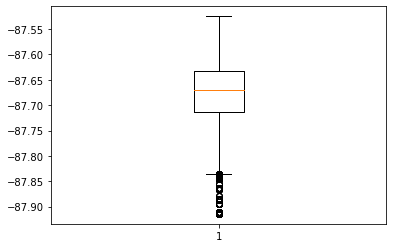

In [46]:
plt.boxplot(bv_reviews_deal3.LONGITUDE)